# 세팅

In [1]:
!pip install psychrochart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 1.4 MB/s 
  Created wheel for psychrolib: filename=PsychroLib-2.5.0-py3-none-any.whl size=9776 sha256=92f7faee9b45a575396672b9cbbac631971a6d3e75f701997547bac68185fcf4
  Stored in directory: /root/.cache/pip/wheels/0c/7b/62/f3e9bc75ec409442e8854d24b3e8d6b72828c5fd4340d5ecc2
Successfully built psychrolib


In [2]:
import pandas as pd
import numpy as np
from psychrochart import load_config, PsychroChart
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
import math as m

# All functions expect base SI units for any arguments given
# DBT   - Dry bulb temperature          - Kelvins, K
# DPT   - Dew point temperature         - Kelvins, K
# H     - Specific enthalpy             - kiloJoules per kilogram, kJ/kg
# P     - Atmospheric pressure          - Pascals, Pa
# Pw    - Water vapor partial pressure  - Pascals, Pa
# RH    - Relative humidity             - Decimal (i.e. not a percentage)
# V     - Specific volume               - Cubic meters per kilogram, m^3/kg
# W     - Humidity ratio                - kilograms per kilograms, kg/kg
# WBT   - Wet bulb temperature          - Kelvins, K

# Minimum dry bulb temperature
Min_DBT=273.15
# Maximum dry bulb temperature
Max_DBT=473.15
# Convergence tolerance
TOL=0.0005

def __DBT_H_RH_P(H, RH, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_RH_P(DBTa, RH, P)-__W_DBT_H(DBTa, H)
        y=__W_DBT_RH_P(DBT, RH, P)-__W_DBT_H(DBT, H)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_H_V_P(H, V, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_V_P(DBTa, V, P)-__W_DBT_H(DBTa, H)
        y=__W_DBT_V_P(DBT, V, P)-__W_DBT_H(DBT, H)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_H_W(H, W):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=W-__W_DBT_H(DBTa, H)
        y=W-__W_DBT_H(DBT, H)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_H_WBT_P(H, WBT, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_WBT_P(DBTa, WBT, P)-__W_DBT_H(DBTa, H)
        y=__W_DBT_WBT_P(DBT, WBT, P)-__W_DBT_H(DBT, H)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_RH_V_P(RH, V, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_RH_P(DBTa, RH, P)-__W_DBT_V_P(DBTa, V, P)
        y=__W_DBT_RH_P(DBT, RH, P)-__W_DBT_V_P(DBT, V, P)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_RH_W_P(RH, W, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_RH_P(DBTa, RH, P)-W
        y=__W_DBT_RH_P(DBT, RH, P)-W
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_RH_WBT_P(RH, WBT, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_WBT_P(DBTa, WBT, P)-__W_DBT_RH_P(DBTa, RH, P)
        y=__W_DBT_WBT_P(DBT, WBT, P)-__W_DBT_RH_P(DBT, RH, P)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_V_W_P(V, W, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=W-__W_DBT_V_P(DBTa, V, P)
        y=W-__W_DBT_V_P(DBT, V, P)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_V_WBT_P(V, WBT, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_WBT_P(DBTa, WBT, P)-__W_DBT_V_P(DBTa, V, P)
        y=__W_DBT_WBT_P(DBT, WBT, P)-__W_DBT_V_P(DBT, V, P)
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

def __DBT_W_WBT_P(W, WBT, P):
    [DBTa, DBTb]=[Min_DBT, Max_DBT]
    DBT=(DBTa+DBTb)/2
    while DBTb-DBTa>TOL:
        ya=__W_DBT_WBT_P(DBTa, WBT, P)-W
        y=__W_DBT_WBT_P(DBT, WBT, P)-W
        if __is_positive(y)==__is_positive(ya):
            DBTa=DBT
        else:
            DBTb=DBT
        DBT=(DBTa+DBTb)/2
    return DBT

# ASHRAE 2009 Chapter 1 Equation 39
def __DPT_Pw(Pw):
    Pw=Pw/1000
    C14=6.54
    C15=14.529
    C16=0.7389
    C17=0.09486
    C18=0.4569
    a=m.log(Pw)
    return (C14+C15*a+C16*a**2+C17*a**3+C18*Pw**0.1984)+273.15

# ASHRAE 2009 Chapter 1 Equation 32
def __H_DBT_W(DBT, W):
    if __valid_DBT(DBT):
        DBT=DBT-273.15
        return 1.006*DBT+W*(2501+1.86*DBT)

def __is_positive(x):
    if x>0:
        return True
    else:
        return False

# ASHRAE 2009 Chapter 1 Equation 22
def __Pw_W_P(W, P):
    return W*P/(W+0.621945)

# ASHRAE 2009 Chapter 1 Equation 6
def __Pws(DBT):
    if __valid_DBT(DBT):
        C8=-5.8002206*10**3
        C9=1.3914993
        C10=-4.8640239*10**-2
        C11=4.1764768*10**-5
        C12=-1.4452093*10**-8
        C13=6.5459673
        return m.exp(C8/DBT+C9+C10*DBT+C11*DBT**2+C12*DBT**3+C13*m.log(DBT))

def state(prop1, prop1val, prop2, prop2val,P):
    if prop1==prop2:
        print("Properties must be independent.")
        return
    prop=["DBT","WBT","RH","W","V","H"]
    if prop1 not in prop or prop2 not in prop:
        print("Valid property must be given.")
        return
    prop1i=prop.index(prop1)
    prop2i=prop.index(prop2)
    if prop1i<prop2i:
        cd1=prop1
        cd1val=prop1val
        cd2=prop2
        cd2val=prop2val
    else:
        cd1=prop2
        cd1val=prop2val
        cd2=prop1
        cd2val=prop1val
    if cd1=="DBT":
        DBT=cd1val
        if cd2=="WBT":
            WBT=cd2val
            W=__W_DBT_WBT_P(DBT, WBT, P)
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
        elif cd2=="RH":
            RH=cd2val
            W=__W_DBT_RH_P(DBT, RH, P)
            H=__H_DBT_W(DBT, W)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="W":
            W=cd2val
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="V":
            V=cd2val
            W=__W_DBT_V_P(DBT, V, P)
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="H":
            H=cd2val
            W=__W_DBT_H(DBT, H)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
    elif cd1=="WBT":
        WBT=cd1val
        if cd2=="RH":
            RH=cd2val
            DBT=__DBT_RH_WBT_P(RH, WBT, P)
            W=__W_DBT_RH_P(DBT, RH, P)
            H=__H_DBT_W(DBT, W)
            V=__V_DBT_W_P(DBT, W, P)
        elif cd2=="W":
            W=cd2val
            DBT=__DBT_W_WBT_P(W, WBT, P)
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
        elif cd2=="V":
            V=cd2val
            DBT=__DBT_V_WBT_P(V, WBT, P)
            W=__W_DBT_V_P(DBT, V, P)
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
        elif cd2=="H":
            H=cd2val
            DBT=__DBT_H_WBT_P(H, WBT, P)
            W=__W_DBT_H(DBT, H)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
    elif cd1=="RH":
        RH=cd1val
        if cd2=="W":
            W=cd2val
            DBT=__DBT_RH_W_P(RH, W, P)
            H=__H_DBT_W(DBT, W)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="V":
            V=cd2val
            DBT=__DBT_RH_V_P(RH, V, P)
            W=__W_DBT_RH_P(DBT, RH, P)
            H=__H_DBT_W(DBT, W)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="H":
            H=cd2val
            DBT=__DBT_H_RH_P(H, RH, P)
            W=__W_DBT_RH_P(DBT, RH, P)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
    elif cd1=="W":
        W=cd1val
        if cd2=="V":
            V=cd2val
            DBT=__DBT_V_W_P(V, W, P)
            H=__H_DBT_W(DBT, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
        elif cd2=="H":
            H=cd2val
            DBT=__DBT_H_W(H, W)
            RH=__RH_DBT_W_P(DBT, W, P)
            V=__V_DBT_W_P(DBT, W, P)
            WBT=__WBT_DBT_W_P(DBT, W, P)
    elif cd1=="V":
        V=cd1val
        H=cd2val
        DBT=__DBT_H_V_P(H, V, P)
        W=__W_DBT_V_P(DBT, V, P)
        RH=__RH_DBT_W_P(DBT, W, P)
        WBT=__WBT_DBT_W_P(DBT, W, P)
    return [DBT, H, RH, V, W, WBT]

# ASHRAE 2009 Chapter 1 Equation 22 and Equation 24
def __RH_DBT_W_P(DBT, W, P):
    if __valid_DBT(DBT):
        return W*P/((0.621945+W)*__Pws(DBT))

# ASHRAE 2009 Chapter 1 Equation 28
def __V_DBT_W_P(DBT, W, P):
    if __valid_DBT(DBT):
        return 287.042*DBT*(1+1.607858*W)/P

# ASHRAE 2009 Chapter 1 Equation 32
def __W_DBT_H(DBT, H):
    if __valid_DBT(DBT):
        DBT=DBT-273.15
        return (H-1.006*DBT)/(2501+1.86*DBT)

# ASHRAE 2009 Chapter 1 Equation 22 and Equation 24
def __W_DBT_RH_P(DBT, RH, P):
    if __valid_DBT(DBT):
        Pw=RH*__Pws(DBT)
        return 0.621945*Pw/(P-Pw)

# ASHRAE 2009 Chapter 1 Equation 28
def __W_DBT_V_P(DBT, V, P):
    if __valid_DBT(DBT):
        return (P*V-287.042*DBT)/(1.607858*287.042*DBT)

# ASHRAE 2009 Chapter 1 Equation 35
def __W_DBT_WBT_P(DBT, WBT, P):
    if __valid_DBT(DBT):
        DBT=DBT-273.15
        WBT=WBT-273.15
        return ((2501-2.326*WBT)*__W_DBT_RH_P(WBT+273.15,1,P)-1.006*(DBT-WBT))/\
               (2501+1.86*DBT-4.186*WBT)

# ASHRAE 2009 Chapter 1 Equation 35
def __WBT_DBT_W_P(DBT, W, P):
    if __valid_DBT(DBT):
        WBTa=__DPT_Pw(__Pw_W_P(W, P))
        WBTb=DBT
        WBT=(WBTa+WBTb)/2
        while WBTb-WBTa>TOL:
            Ws=__W_DBT_WBT_P(DBT, WBT, P)
            if W>Ws:
                WBTa=WBT
            else:
                WBTb=WBT
            WBT=(WBTa+WBTb)/2
        return WBT

def __valid_DBT(DBT):
    if Min_DBT<=DBT<=Max_DBT:
        return True
    else:
        return False

# 작물 세팅

s1 조조가온 0408  
s2 광합성 0818  
s3 동화산물전류 1822  
s4 호흡감소 2204  

변온관리가 가능  
일반적인 기후  
온도와 습도 조절 가능한 상황

세팅값  
구간 설정, 작물별 구간설정온도, 작물 선호 습도, 특정구간처리  

토마토 고습중점  
과실착과 낮 2129 밤 1521
습도 6580

유효적온작물 고추  
낮2030 최고35 최저10  
개화결실 1621 착과 18이상
습도 6080


적산온도작물 콩<<농진청상담후>>  
적산온도요구량 2500~3000  
낮밤 온도차 심하면 결실 및 품질향상에 좋은 영향  


# 계산식 구성

In [4]:
# Dry bulb temperature (DBT)
# Specific enthalpy (H)
# Relative humidity (RH)
# Specific volume (V)
# Humidity ratio (W)
# Wet bulb temperature (WBT)
# 건구, H, 상대습도, V, 절대습도, 습구
Kel = 273.15

In [5]:
def rr (v):
  v = round(v,2)
  return v

In [6]:
def KorC (t):
  if t<=100:
    # t는 C
    t = t+Kel
    return t
  else:
    # t는 K
    return t

In [7]:
# 구간 설정에 따른 온습도 설정값 반환
def section (i):
  [t1,t2,opt1,opt2,oph1,oph2] = [0,0,0,0,0,0]

  # if i == 1:
  #   t1 = 400
  #   t2 = 600
  #   opt1 = 18.0
  #   opt2 = 21.0
  #   oph1 = 60.0
  #   oph2 = 80.0
  #   return [t1,t2,opt1,opt2,oph1,oph2]

  # if i == 2:
  #   t1 = 0600
  #   t2 = 1800
  #   opt1 = 18.0
  #   opt2 = 21.0
  #   oph1 = 60.0
  #   oph2 = 80.0
  #   return [t1,t2,opt1,opt2,oph1,oph2]

  if i == 3:
    t1 = 1800
    t2 = 2200
    opt1 = 15.0 #생육한계저온
    opt2 = 25.0 #생육적온
    opt3 = 30.0 #생육한계고온
    oph1 = 60.0 #저습한계
    oph2 = 80.0 #고습한계
    return [t1,t2,opt1,opt2,opt3,oph1,oph2]

  # if i == 4:
  #   t1 = 2200
  #   t2 = 2359
  #   opt1 = 18.0
  #   opt2 = 21.0
  #   oph1 = 60.0
  #   oph2 = 80.0
  #   return [t1,t2,opt1,opt2,oph1,oph2]

In [8]:
# 건구,상대습도에 따른 값 반환
def psycalTRH (t, h):
  a = KorC(t)
  b = rr(h/100)
  outlist1 = state("DBT",a,"RH",b,101325)
  return outlist1

In [9]:
# 건구, 절대습도에 따른 값 반환
def psycalTW (t, w):
  a = KorC(t)
  outlist2 = state("DBT",a,"W",w,101325)
  return outlist2

In [10]:
psycalTRH(20,80)

[293.15,
 49.81884176037096,
 0.8,
 0.8460835911357325,
 0.011700749255523979,
 290.829212207366]

건구, H, 상대습도, V, 절대습도, 습구

[t1,t2,opt1,opt2,opt3,oph1,oph2]  
    t1 = 1800  
    t2 = 2200  
    opt1 = 15.0 #생육한계저온  
    opt2 = 25.0 #생육적온  
    opt3 = 30.0 #생육한계고온  
    oph1 = 60.0 #저습한계  
    oph2 = 80.0 #고습한계  

In [11]:
# 건구 상대습도
def cal_temp_hum (t, h, s):
  temp = t
  rhum = h
  ss = section(s)
  # 작동 불가 상황
  # 한계저온 이하
  if temp<=ss[2]:
    print('온도가 너무 낮습니다.')
  # 다습  
  elif rhum >=ss[6]:
    print('습도가 너무 높습니다.')

  # 작동 가능 상황
  elif (temp>ss[2]) & (rhum<ss[6]):
    ex1 = psycalTRH(temp, rhum)
    hr1 = ex1[4]
    settemp = temp
    p1 = temp
    # 누적적온 계산 값 추가(4단계 호흡감소기에만 적용)

    # 적정 온도 + 적정 습도
    if (temp<ss[3]) & (ss[5]<rhum):
      while (ss[2]<settemp):
        settemp = settemp-0.01
        # settemp와 절대습도를 기준으로 상대습도 값 계산
        ex2 = psycalTW(settemp, hr1)
        rhum2 = ex2[2]
        rhum2 = rhum2*100

        if (ss[2]<=settemp) & (ss[5]<=rhum2) & (rhum2<ss[6]):
          st = settemp
          rh = rhum2
          continue
        # and 설정으로 온도가 벗어나거나 습도가 벗어나면 반복 종료  
        else:
          st = rr(st)
          rh = rr(rh)
          cal = [temp,rhum,st,rh]
          return cal, ss

    # 한계고온 이상
    elif ss[4]<=temp:
      while ss[2]<=settemp:
        settemp = settemp-0.01
        ex2 = psycalTW(settemp, hr1)
        rhum2 = ex2[2]
        rhum2 = rhum2*100

        if (ss[2]<=settemp) & (rhum2<ss[6]):
          st = settemp
          rh = rhum2
          continue
        else:
          st = rr(st)
          rh = rr(rh)
          if st>ss[4]:
            print('냉방 필요')
          cal = [temp,rhum,st,rh]
          return cal, ss
    
    # 건조
    elif ss[5]>=rhum:
      while ss[2]<=settemp:
        settemp = settemp-0.01
        ex2 = psycalTW(settemp, hr1)
        rhum2 = ex2[2]
        rhum2 = rhum2*100

        if (ss[2]<=settemp) & (rhum2<ss[6]):
          st = settemp
          rh = rhum2
          continue
        else:
          st = rr(st)
          rh = rr(rh)
          if rh<ss[5]:
            print('습 보충 필요')
          cal = [temp,rhum,st,rh]
          return cal, ss

In [44]:
cal_set = cal_temp_hum(20,70,3)
print(cal_set[0])

[20, 70, 17.87, 79.96]


# AH 칼럼 추가(절대습도량 없이 상대습도만 있을 경우 사용)
def AHadd(df):
  i = 0
  while i < df.shape[0]:
    ts = tset(i)
    hs = hset(i)
    outset=state("DBT",ts,"RH",hs,101325)
    df['HR'] = outset[4]
    i += 1

def tset (i):
  t1 = df['intemp'][i]
  t2 = t1+Kel
  t = round(t2,2)
  return t

def hset (i):
  h1 = df['inhum'][i]
  h2 = h1/100
  h = round(h2,2)
  return h

# 데이터

In [13]:
dt = pd.read_csv('/content/drive/MyDrive/test/22산학 - 고추하우스프로젝트/테스트데이터/토마토3전처리완.csv')

In [14]:
dt

,datetime,AH,RH,Temp,hour,date
0,2021-09-27 00:00:00,14.60,95.89,17.90,0,210927
1,2021-09-27 00:05:00,14.69,96.00,17.90,5,210927
2,2021-09-27 00:10:00,14.61,96.00,17.90,10,210927
3,2021-09-27 00:15:00,14.60,96.00,17.90,15,210927
4,2021-09-27 00:20:00,14.60,96.00,17.81,20,210927
...,...,...,...,...,...,...
55591,2021-12-31 23:35:00,8.55,65.75,14.78,2335,211231
55592,2021-12-31 23:40:00,8.60,66.00,14.95,2340,211231
55593,2021-12-31 23:45:00,8.67,65.25,15.22,2345,211231
55594,2021-12-31 23:50:00,8.77,65.00,15.37,2350,211231


In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  55596 non-null  object 
 1   AH        55596 non-null  float64
 2   RH        55596 non-null  float64
 3   Temp      55596 non-null  float64
 4   hour      55596 non-null  int64  
 5   date      55596 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ MB


In [16]:
dt.describe()

,AH,RH,Temp,hour,date
count,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000
mean,12.993026,82.954775,18.161298,1177.245845,211109.298673
std,2.761140,7.090136,3.440678,692.581349,84.224037
min,7.380000,49.120000,11.700000,0.000000,210927.000000
25%,10.900000,78.160000,15.800000,555.000000,211023.000000
50%,12.400000,83.000000,16.900000,1155.000000,211114.000000
75%,14.700000,88.000000,19.900000,1755.000000,211206.000000
max,26.070000,98.000000,30.960000,2355.000000,211231.000000


In [17]:
ds0 = dt.query('211001<=date & date<=211031')

In [18]:
ds0

,datetime,AH,RH,Temp,hour,date
1152,2021-10-01 00:00:00,12.82,90.16,16.80,0,211001
1153,2021-10-01 00:05:00,12.80,90.00,16.88,5,211001
1154,2021-10-01 00:10:00,12.88,89.16,17.07,10,211001
1155,2021-10-01 00:15:00,12.90,88.16,17.27,15,211001
1156,2021-10-01 00:20:00,12.82,87.16,17.38,20,211001
...,...,...,...,...,...,...
19870,2021-10-31 23:50:00,11.80,87.00,16.40,2350,211031
19871,2021-10-31 23:50:00,11.80,87.00,16.41,2350,211031
19872,2021-10-31 23:55:00,11.80,87.00,16.40,2355,211031
19873,2021-10-31 23:55:00,11.80,87.00,16.40,2355,211031


In [19]:
ds0 = ds0.drop_duplicates(['date','hour'])

In [20]:
ds0 = ds0.reset_index(drop=True)

In [21]:
ds0

,datetime,AH,RH,Temp,hour,date
0,2021-10-01 00:00:00,12.82,90.16,16.80,0,211001
1,2021-10-01 00:05:00,12.80,90.00,16.88,5,211001
2,2021-10-01 00:10:00,12.88,89.16,17.07,10,211001
3,2021-10-01 00:15:00,12.90,88.16,17.27,15,211001
4,2021-10-01 00:20:00,12.82,87.16,17.38,20,211001
...,...,...,...,...,...,...
8923,2021-10-31 23:35:00,11.80,87.00,16.37,2335,211031
8924,2021-10-31 23:40:00,11.97,87.00,16.57,2340,211031
8925,2021-10-31 23:45:00,11.83,87.00,16.51,2345,211031
8926,2021-10-31 23:50:00,11.80,87.00,16.41,2350,211031


In [22]:
ds0['date'] = ds0['date'].astype(str)
ds0['hour'] = ds0['hour'].astype(str)

In [23]:
i = 0
while i < len(ds0.index):
  ds0['hour'][i] = ds0['hour'][i].zfill(4)
  i +=1

<ipython-input-23-96a828bd84d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds0['hour'][i] = ds0['hour'][i].zfill(4)


In [24]:
ds0['dateset'] = str(20)+ds0['date']+ds0['hour']

In [25]:
ds0['dateset'] = pd.to_datetime(ds0['dateset'],format='%Y%m%d%H%M')

In [26]:
ds0

,datetime,AH,RH,Temp,hour,date,dateset
0,2021-10-01 00:00:00,12.82,90.16,16.80,0000,211001,2021-10-01 00:00:00
1,2021-10-01 00:05:00,12.80,90.00,16.88,0005,211001,2021-10-01 00:05:00
2,2021-10-01 00:10:00,12.88,89.16,17.07,0010,211001,2021-10-01 00:10:00
3,2021-10-01 00:15:00,12.90,88.16,17.27,0015,211001,2021-10-01 00:15:00
4,2021-10-01 00:20:00,12.82,87.16,17.38,0020,211001,2021-10-01 00:20:00
...,...,...,...,...,...,...,...
8923,2021-10-31 23:35:00,11.80,87.00,16.37,2335,211031,2021-10-31 23:35:00
8924,2021-10-31 23:40:00,11.97,87.00,16.57,2340,211031,2021-10-31 23:40:00
8925,2021-10-31 23:45:00,11.83,87.00,16.51,2345,211031,2021-10-31 23:45:00
8926,2021-10-31 23:50:00,11.80,87.00,16.41,2350,211031,2021-10-31 23:50:00


In [27]:
ds0['date'] = ds0['date'].astype(int)

In [28]:
ds01 = ds0.query('date==211005')

In [29]:
ds01['hour'] = ds01['hour'].astype(int)

<ipython-input-29-fec7e6352dd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds01['hour'] = ds01['hour'].astype(int)


In [30]:
ds01

,datetime,AH,RH,Temp,hour,date,dateset
1152,2021-10-05 00:00:00,15.90,95.91,19.41,0,211005,2021-10-05 00:00:00
1153,2021-10-05 00:05:00,15.81,95.07,19.31,5,211005,2021-10-05 00:05:00
1154,2021-10-05 00:10:00,15.80,95.00,19.30,10,211005,2021-10-05 00:10:00
1155,2021-10-05 00:15:00,15.71,95.00,19.30,15,211005,2021-10-05 00:15:00
1156,2021-10-05 00:20:00,15.51,95.00,19.21,20,211005,2021-10-05 00:20:00
...,...,...,...,...,...,...,...
1435,2021-10-05 23:35:00,13.20,90.00,17.50,2335,211005,2021-10-05 23:35:00
1436,2021-10-05 23:40:00,13.20,90.00,17.50,2340,211005,2021-10-05 23:40:00
1437,2021-10-05 23:45:00,13.20,90.00,17.59,2345,211005,2021-10-05 23:45:00
1438,2021-10-05 23:50:00,13.20,90.00,17.51,2350,211005,2021-10-05 23:50:00


In [31]:
ds01.describe()

,AH,RH,Temp,hour,date
count,288.000000,288.000000,288.000000,288.000000,288.0
mean,15.710660,85.517153,21.261389,1177.500000,211005.0
std,1.931074,9.473598,3.947800,693.639093,0.0
min,13.100000,68.110000,16.710000,0.000000,211005.0
25%,14.010000,75.595000,17.770000,588.750000,211005.0
50%,15.405000,90.000000,19.310000,1177.500000,211005.0
75%,17.092500,93.000000,24.855000,1766.250000,211005.0
max,22.110000,96.000000,29.160000,2355.000000,211005.0


In [32]:
ds01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1152 to 1439
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  288 non-null    object        
 1   AH        288 non-null    float64       
 2   RH        288 non-null    float64       
 3   Temp      288 non-null    float64       
 4   hour      288 non-null    int64         
 5   date      288 non-null    int64         
 6   dateset   288 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 18.0+ KB


In [33]:
ds01.set_index('datetime', drop=True)

,AH,RH,Temp,hour,date,dateset
datetime,,,,,,
2021-10-05 00:00:00,15.90,95.91,19.41,0,211005,2021-10-05 00:00:00
2021-10-05 00:05:00,15.81,95.07,19.31,5,211005,2021-10-05 00:05:00
2021-10-05 00:10:00,15.80,95.00,19.30,10,211005,2021-10-05 00:10:00
2021-10-05 00:15:00,15.71,95.00,19.30,15,211005,2021-10-05 00:15:00
2021-10-05 00:20:00,15.51,95.00,19.21,20,211005,2021-10-05 00:20:00
...,...,...,...,...,...,...
2021-10-05 23:35:00,13.20,90.00,17.50,2335,211005,2021-10-05 23:35:00
2021-10-05 23:40:00,13.20,90.00,17.50,2340,211005,2021-10-05 23:40:00
2021-10-05 23:45:00,13.20,90.00,17.59,2345,211005,2021-10-05 23:45:00


In [34]:
ds01 = ds01.drop(['dateset'],axis=1)

# 생육적온 기준 낮 누적값과 야간 누적값 0이상으로 설정

ds01_resample['Temp'] = ds01.Temp.resample('1H').mean()
ds01_resample['RH'] = ds01.RH.resample('1H').mean()

In [35]:
ds01_resample = pd.DataFrame()

In [36]:
# i = 0
# plustemp = 0
# while i < len(ds01.index):
#   a = ds01['tst'].iloc[i]
#   if a>0:
#     plustemp = plustemp + a
#     i = i+1
#   else:
#     i = i+1
# print(plustemp)
# #   if (ds01['tst'].iloc[i])>=0:
# #     plustemp = plustemp + ds01['tst'].iloc[i]
# #     i += 1
# #   else:
# #     i += 1
# # print(plustemp)

In [37]:
# plustemp/(6*12)

# 계산 및 시각화

In [38]:
plt.rcParams['figure.figsize'] = [3, 3] # [width, height] (inches)

In [39]:
# fig, ax = plt.subplots()
# plt.plot(ds01['hour'], ds01['Temp'], label="Temp")
# plt.hlines(20.27,ds01['hour'][0],ds01['hour'][len(ds01.index)-1],colors='gray',linestyles='solid', label="setline")

# plt.legend(loc="best",fontsize='20')
# hours = mdates.HourLocator(interval = 1)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# plt.grid()
# plt.show()

[t1,t2,opt1,opt2,opt3,oph1,oph2]
t1 = 1800
t2 = 2200
opt1 = 15.0 #생육한계저온
opt2 = 25.0 #생육적온
opt3 = 30.0 #생육한계고온
oph1 = 60.0 #저습한계
oph2 = 80.0 #고습한계

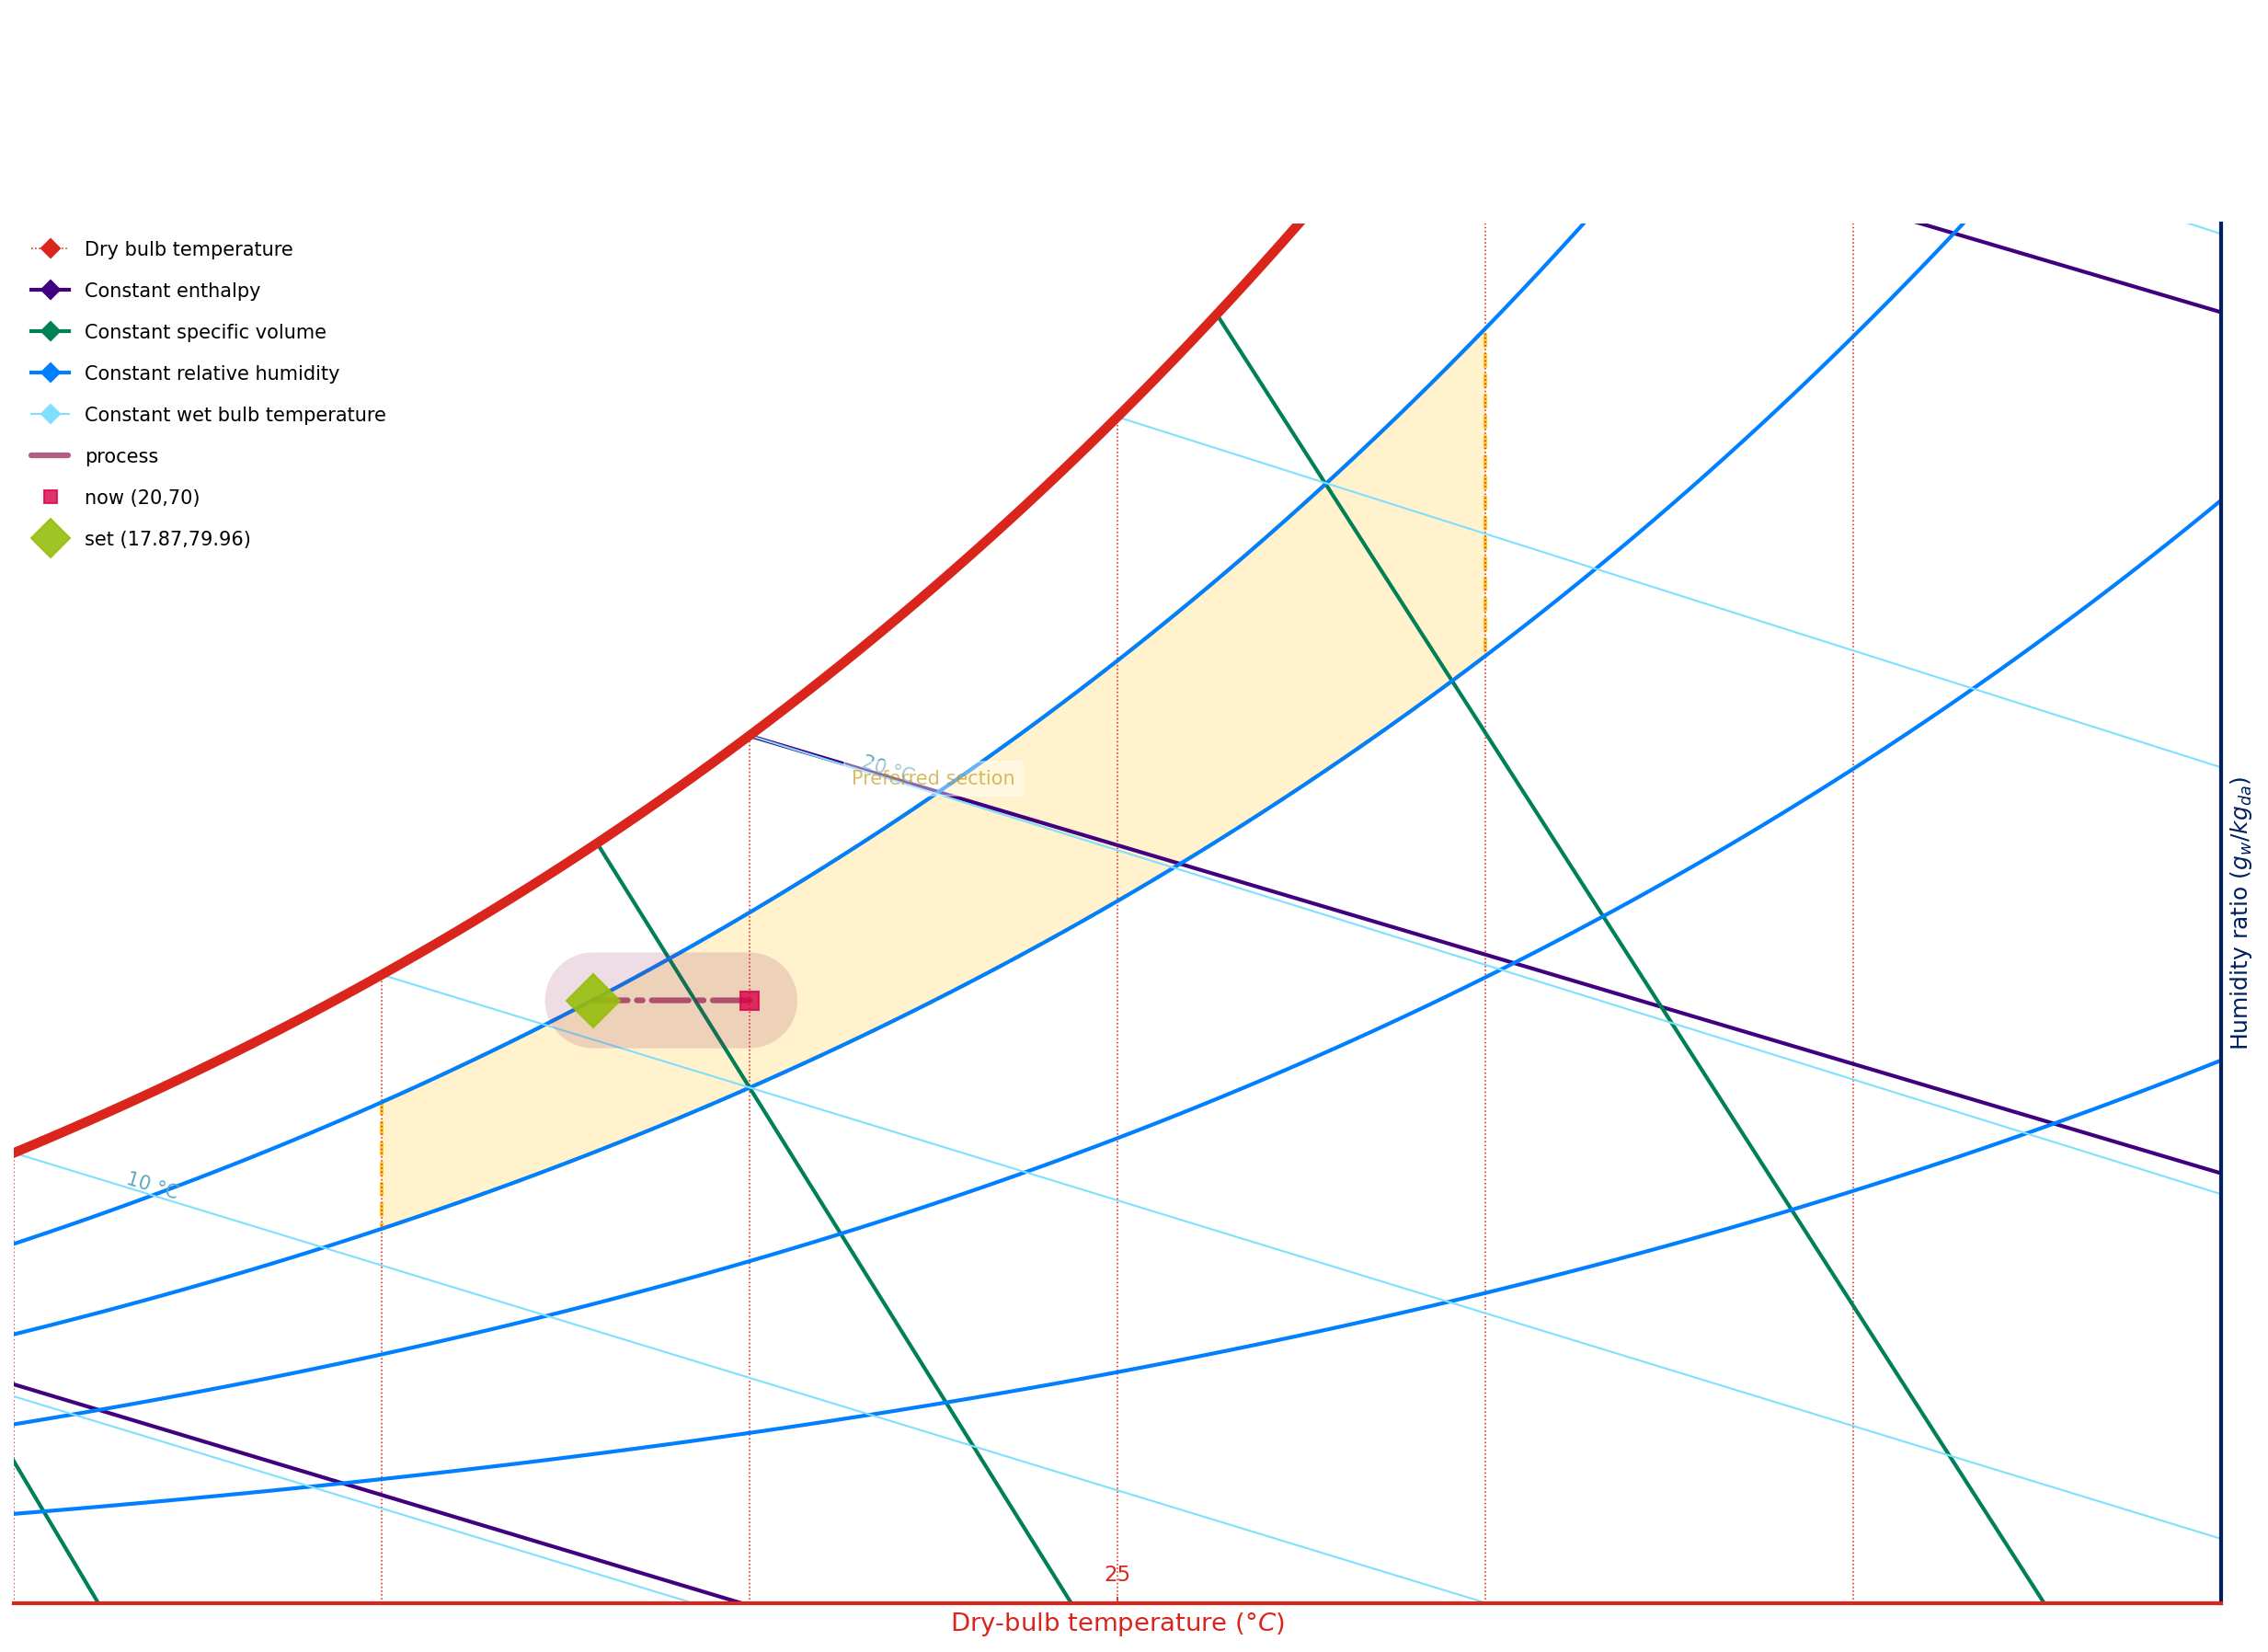

In [45]:
# Get a preconfigured chart
chart = PsychroChart("minimal")

# Append zones:
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
                      "facecolor": [1.0, 0.749, 0.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [cal_set[1][2], cal_set[1][4]],
            "points_y": [cal_set[1][5], cal_set[1][6]],
            "label": "Preferred section"
          }]}
#         {
#             "zone_type": "dbt-rh",
#             "style": {"edgecolor": [0.498, 0.624, 0.8],
#                       "facecolor": [0.498, 0.624, 1.0, 0.2],
#                       "linewidth": 2,
#                       "linestyle": "--"},
#             "points_x": [18, 23],
#             "points_y": [35, 55],
#             "label": "Winter"
#         }]}
chart.append_zones(zones_conf)

# Plot the chart
ax = chart.plot()

# 각 포인터 설정
points = {'now': {'label': 'now (%s,%s)'% (cal_set[0][0],cal_set[0][1]),
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 's', 'markersize': 10},
                       'xy': (cal_set[0][0],cal_set[0][1])},
          'set': {'label': 'set (%s,%s)'% (cal_set[0][2],cal_set[0][3]),
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'D', 'markersize': 20},
                       'xy': (cal_set[0][2],cal_set[0][3])}}



# # 박스 설정
# box = {'boxstyle': 'square','ec': (0.5, 0.5, 1.0),'fc': (0.8, 0.8, 1.0),'linestyle': '--'}
# # 폰트 설정
# font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16}

# # ax.text(cal_set[0],cal_set[1],cal_set[0],fontsize=10,bbox=box)
# # bbox_position_size = 'bottom'

# # 포인터 값 표시
# ax.text(cal_set[0], cal_set[1], cal_set[0], fontdict=font, bbox=box)


# 포인터 사이 연결
connectors = [{'start': 'now',
               'end': 'set',
               'label': 'process',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 3, "linestyle": "-."}}]
chart.plot_points_dbt_rh(points, connectors)

# Add a legend
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
ax.get_figure()